### **1. Loading data and cleaning data**

In [26]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [27]:
df = pd.read_csv('/content/drive/MyDrive/DS Datasets.\/cars_ds_final.csv')
df.sample(8)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
618,618,Tata,Tigor Ev,Xt+,"Rs. 9,75,868",NaN,NaN,NaN,FWD (Front Wheel Drive),NaN,BS VI,NaN,Injection,35 litres,Electric,1537 mm,3992 mm,1677 mm,Sedan,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M1 Category,NaN,NaN,NaN,NaN,NaN,"21.5 kWh,Battery Placed Under Rear Seats",213 km/full charge
748,748,Kia,Carnival,Premium 8 Str,"Rs. 25,15,000",2199 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,NaN,Diesel,1755 mm,5115 mm,1985 mm,MUV,5.0,...,"Audio Controls, Cup Holders",Yes,NaN,Yes,NaN,NaN,Yes,Yes,Yes,Yes,NaN,Yes,CRDi,NaN,Yes,NaN,NaN,Yes,NaN,NaN
1009,1009,Hyundai,Elantra,S,"Rs. 15,89,000",1999 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,50 litres,Petrol,1465 mm,4620 mm,1800 mm,Sedan,4.0,...,Cup Holders,Yes,NaN,Yes,NaN,NaN,Yes,Yes,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
689,689,Mahindra,E Verito,D6,"Rs. 13,03,241",72 cc,NaN,NaN,FWD (Front Wheel Drive),NaN,NaN,NaN,NaN,NaN,Electric,1540 mm,4247 mm,1740 mm,Sedan,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 ampere-hour,110 km/full charge
514,514,Tata,Nexon,Xza Plus (O) Dual Tone,"Rs. 11,20,000",1198 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,NaN,Injection,44 litres,Petrol,1607 mm,3994 mm,1811 mm,SUV,5.0,...,Cup Holders,Yes,NaN,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
133,133,Hyundai,Aura,E 1.2 Petrol,"Rs. 5,79,900",1197 cc,NaN,NaN,FWD (Front Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,37 litres,Petrol,1520 mm,3995 mm,1680 mm,Sedan,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,619,Tata,Tigor Ev,Xe+,"Rs. 9,44,175",NaN,NaN,NaN,FWD (Front Wheel Drive),NaN,BS VI,NaN,Injection,35 litres,Electric,1537 mm,3992 mm,1677 mm,Sedan,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M1 Category,NaN,NaN,NaN,NaN,NaN,"21.5 kWh,Battery Placed Under Rear Seats",213 km/full charge
824,824,Volvo,Xc90,T8 Excellence,"Rs. 1,31,24,000",1969 cc,4.0,4.0,AWD (All Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,68 litres,Hybrid,1776 mm,4950 mm,2140 mm,SUV,5.0,...,Cup Holders,Yes,Yes,Yes,NaN,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


### **2.showning important features regarding the dataset**

In [28]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

### **3. Exploratory Data analysis**

In [29]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

### **4.  Checking a sample of dataset after cleaning it**

In [30]:
df.sample(6)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
234,Honda,Jazz,Honda Jazz,Exclusive Edition Cvt,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1199,4,18.20,87.78,110,40.0,1544.0,3955.0,1694.0,5,5,2530.0,2,12992
63,Maruti Suzuki,Celerio X,Maruti Suzuki Celerio X,Vxi,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),998,3,23.10,67.07,90,35.0,1560.0,3600.0,1600.0,5,5,2425.0,1,6652
912,Maruti Suzuki,Baleno,Maruti Suzuki Baleno,1.2 Zeta Cvt,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1197,4,21.04,81.86,115,37.0,1510.0,3995.0,1745.0,5,5,2520.0,2,11618
667,Mahindra,Xuv500,Mahindra Xuv500,W7,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),2179,4,15.10,152.88,330,70.0,1785.0,4585.0,1890.0,5,7,2700.0,2,19856
404,Mahindra,Kuv100 Nxt,Mahindra Kuv100 Nxt,K8 6 Str Dual Tone,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1198,3,18.15,80.88,115,35.0,1655.0,3700.0,1735.0,5,6,2385.0,2,9814
1166,Jaguar,F-Type,Jaguar F-Type,2.0L Coupe,Coupe,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),1997,6,15.30,292.94,400,63.0,1311.0,4482.0,1923.0,2,2,2622.0,2,127296


### **5. Finding what is the main features regarding a particular the car**

In [42]:
df[df.model =='Elite I20']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
121,Hyundai,Elite I20,Hyundai Elite I20,Era 1.2,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,18.60,82.85,115,45.0,1505.0,3995.0,1710.0,5,5,2525.0,2,7835
122,Hyundai,Elite I20,Hyundai Elite I20,Era 1.4 Crdi,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1396,4,22.54,88.77,220,45.0,1505.0,3985.0,1734.0,5,5,2570.0,2,9769
123,Hyundai,Elite I20,Hyundai Elite I20,Magna Plus,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,18.60,82.85,115,45.0,1505.0,3985.0,1734.0,5,5,2570.0,2,8889
124,Hyundai,Elite I20,Hyundai Elite I20,Magna Plus Crdi,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1396,4,22.54,88.77,220,45.0,1505.0,3985.0,1734.0,5,5,2570.0,2,10791
125,Hyundai,Elite I20,Hyundai Elite I20,Sportz Plus,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,18.60,82.85,115,45.0,1505.0,3985.0,1734.0,5,5,2570.0,2,10103
126,Hyundai,Elite I20,Hyundai Elite I20,Sportz Plus Crdi Dual Tone,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1396,4,22.54,88.77,220,45.0,1505.0,3985.0,1734.0,5,5,2570.0,2,12265
127,Hyundai,Elite I20,Hyundai Elite I20,Asta (O) 1.2,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,18.15,82.85,114,45.0,1505.0,3995.0,1734.0,5,5,2570.0,6,11325
128,Hyundai,Elite I20,Hyundai Elite I20,Asta (O) Crdi,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1396,4,22.54,88.77,220,45.0,1505.0,3985.0,1734.0,5,5,2570.0,6,13076
129,Hyundai,Elite I20,Hyundai Elite I20,Asta (O) Cvt,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1197,4,18.60,81.86,115,45.0,1505.0,3985.0,1734.0,5,5,2570.0,2,12893
130,Hyundai,Elite I20,Hyundai Elite I20,Sportz Plus Dual Tone,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,18.60,82.85,115,45.0,1505.0,3985.0,1734.0,5,5,2570.0,2,10523


### **6. Checking the price distribution, we will use both normal and log scales due to the huge difference in prices.**

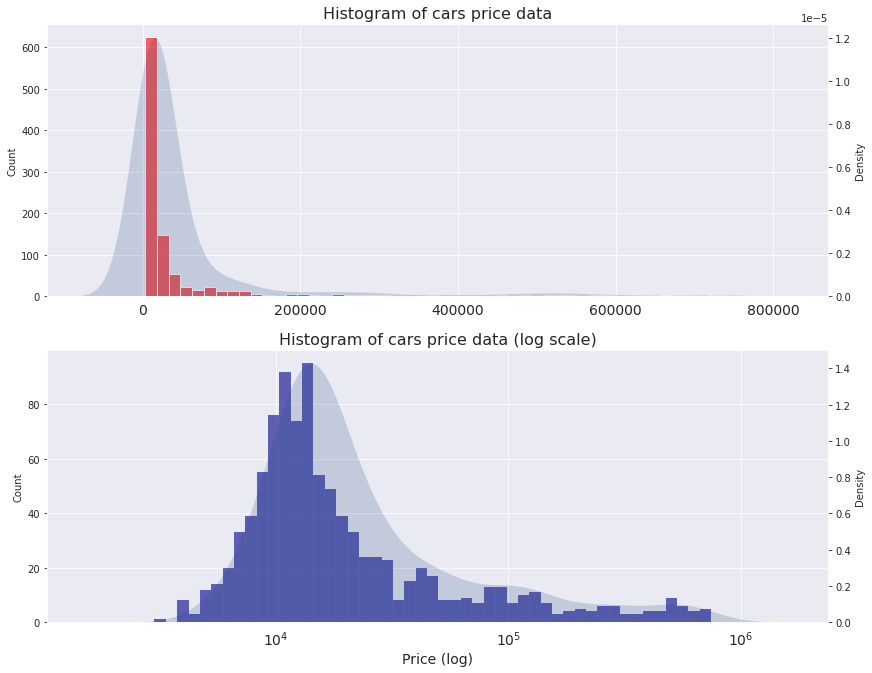

In [44]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='red', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

**There is a lot of varaince in price**

### **7. Check by plotting a box plot**

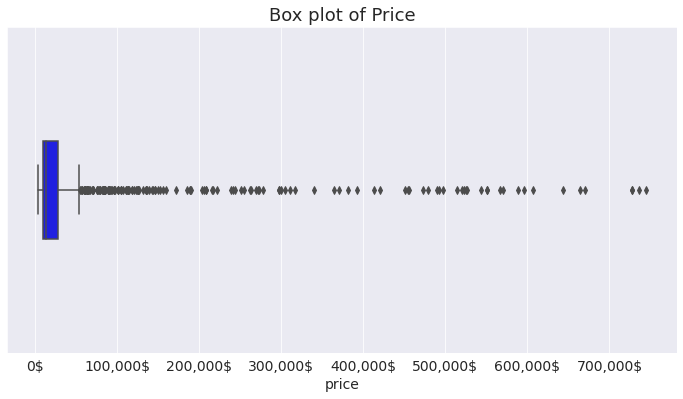

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

### **8. Checking by body type of the cars using bar graph**

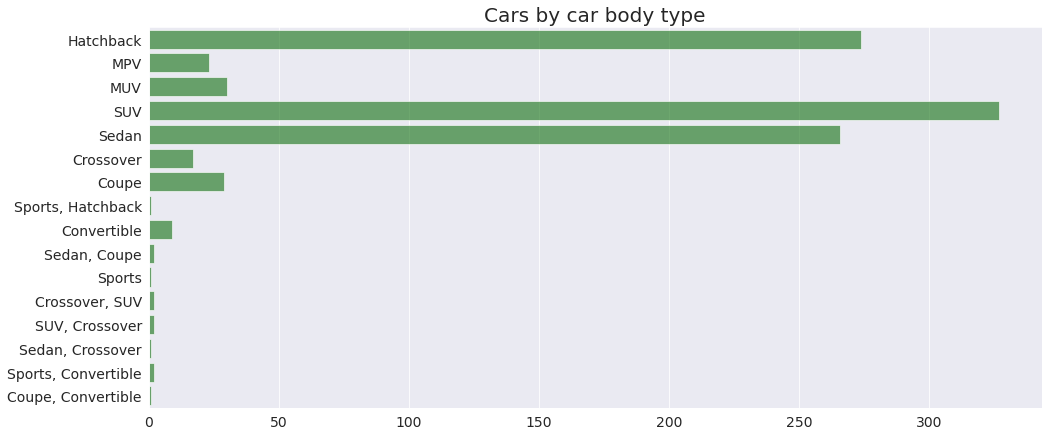

In [43]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='green')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

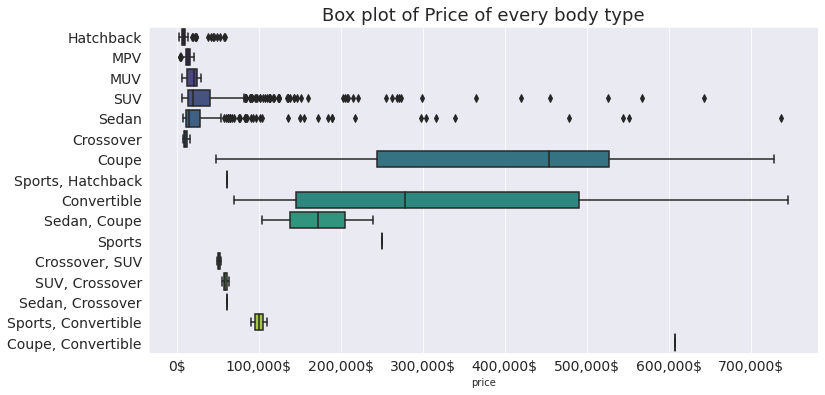

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

### **9. Now we check cars by Fuel type**

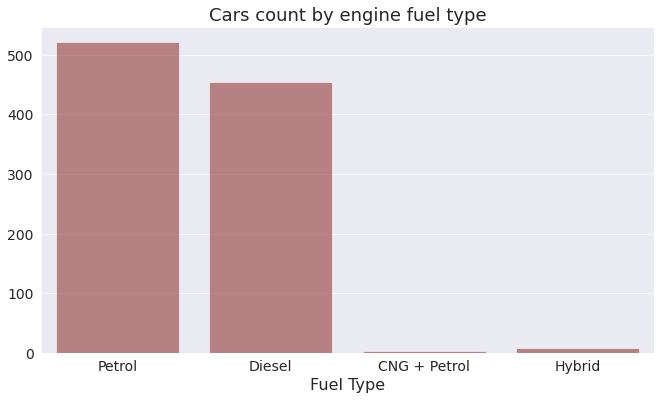

In [53]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='brown')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

### **10. Now we check car by engine size**

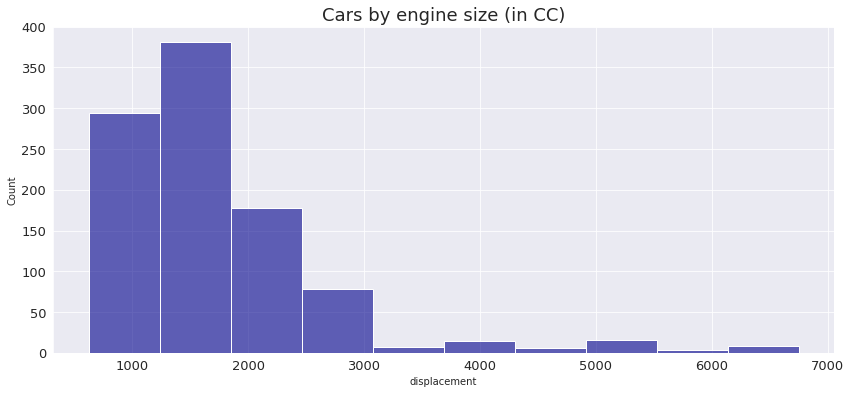

In [54]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### **11. Now We check the Horsepower of cars**

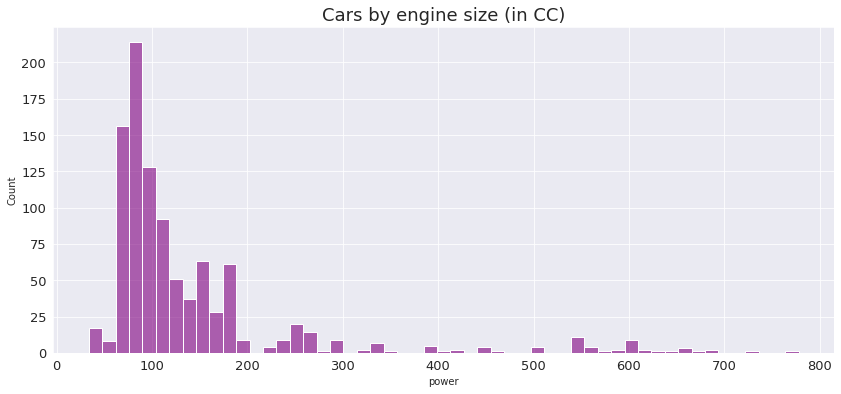

In [50]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.6, color='purple')
plt.title('Cars by engine size (in CC)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### **12. we check the relation horsepower and price considering diffreent body type**

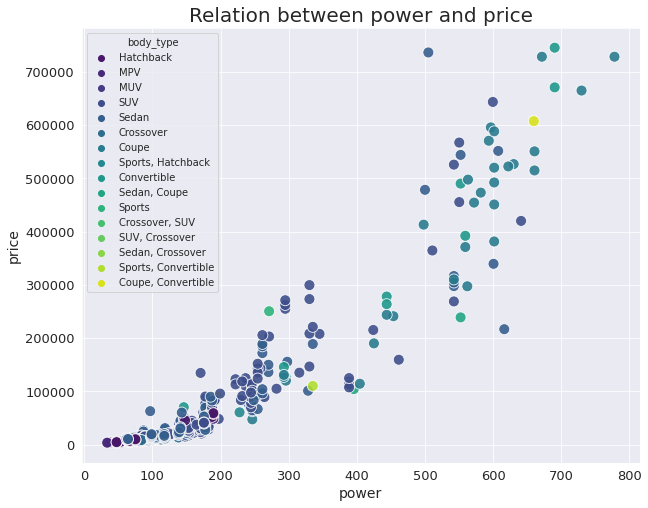

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

### **13. We can also look into the relation between Mileage and price**

<Figure size 720x576 with 0 Axes>

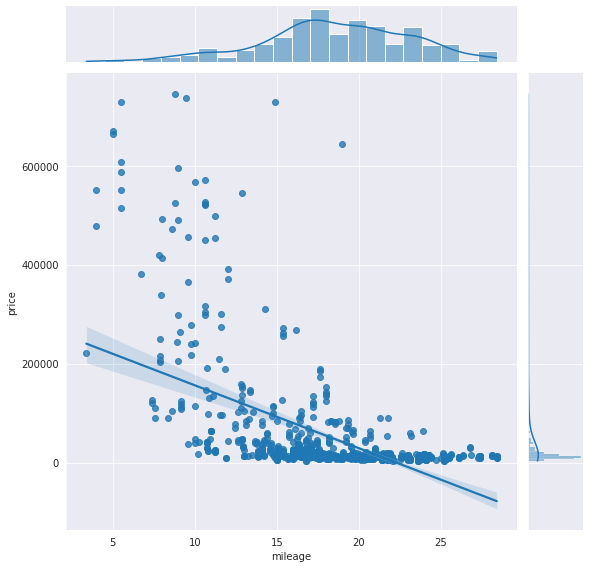

In [39]:
plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between Power and price', fontsize=18)
ax.set_xlabel('Power (HP)', fontsize= 15);

### **14.we check an extensive scatter plot grid of more numerical variable to investigate the realtion in more detail**

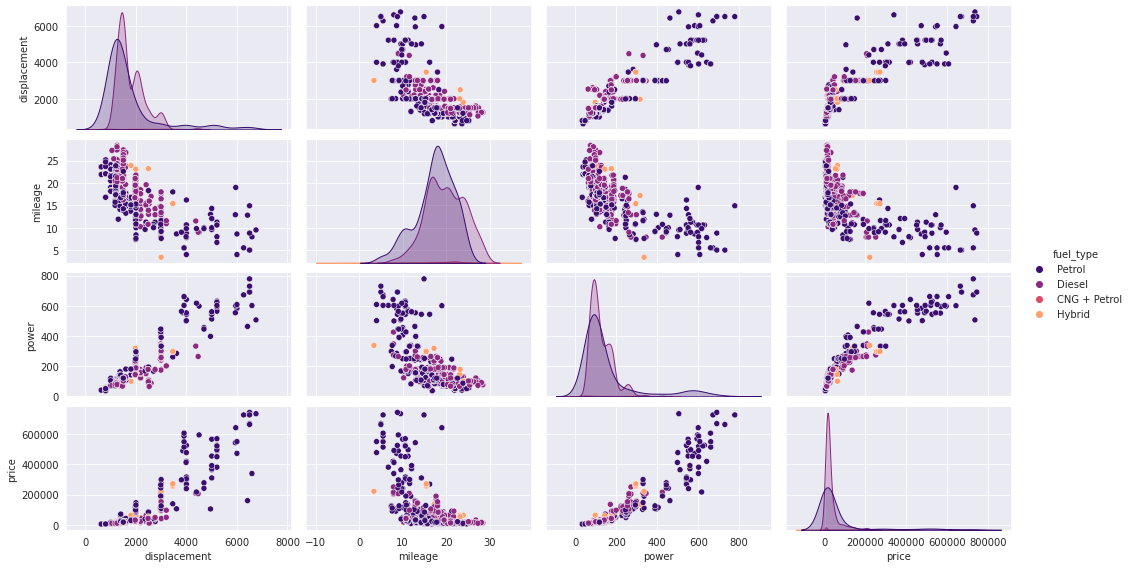

In [40]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

### **15. Now lets make a 3D scatter plot to check for obvious clusters with main features as price horsepower and mileage**

In [41]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();